In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
data = pd.read_csv("17-googleplaystore.csv")

In [135]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


data.isna().sum()

In [141]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [143]:
data["Rating"] = data["Rating"].fillna(data["Rating"].mean())

Boş verileri ortalama ile tamamlıyoruz.

In [145]:
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [147]:
data.dropna(inplace=True)

In [149]:
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [151]:
data["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [153]:
data["Reviews"] = data["Reviews"].astype(int)

Kolonumuz sayısal verilere çevrilebildiğinden çevirdim. Korelasyona uygun hale geldi.

In [155]:
data["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [167]:
data["Size"] = data["Size"].str.replace("M","000")
data["Size"] = data["Size"].str.replace("k","")
data["Size"] = data["Size"].replace("",np.nan)
data["Size"] = data["Size"].replace("Varies with device",np.nan)

In [173]:
data["Size"] = data["Size"].astype(float)
data["Size"] = data["Size"].fillna(data["Size"].mean())

"Size" kolonunu korelasyona uygun hale getirdim.

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int32  
 4   Size            10829 non-null  float64
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


In [177]:
data["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [179]:
data["Installs"] = data["Installs"].str.replace("+","")
data["Installs"] = data["Installs"].str.replace(",","")

In [181]:
data["Installs"] = data["Installs"].astype(int)

"Installs" kolonunu korelasyona uygun hale getirdim.

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int32  
 4   Size            10829 non-null  float64
 5   Installs        10829 non-null  int32  
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(2), int32(2), object(9)
memory usage: 1.1+ MB


In [185]:
data.describe()

,Rating,Reviews,Size,Installs
count,10829.000000,1.082900e+04,10829.000000,1.082900e+04
mean,4.192041,4.446018e+05,19597.990848,1.547990e+07
std,0.479038,2.929213e+06,22087.016493,8.507114e+07
min,1.000000,0.000000e+00,1.000000,0.000000e+00
25%,4.100000,3.800000e+01,6.800000,5.000000e+03
50%,4.200000,2.100000e+03,18000.000000,1.000000e+05
75%,4.500000,5.481500e+04,26000.000000,5.000000e+06
max,5.000000,7.815831e+07,100000.000000,1.000000e+09


In [187]:
data["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [189]:
from sklearn.preprocessing import LabelEncoder

In [191]:
labelEncoder = LabelEncoder()

In [193]:
data["Type"] = labelEncoder.fit_transform(data["Type"])

In [197]:
data["Type"].unique()

array([0, 1])

Label Encoder ile "Type" kolonunu korelasyona uygun hale getirdim.

In [199]:
data.describe()

,Rating,Reviews,Size,Installs,Type
count,10829.000000,1.082900e+04,10829.000000,1.082900e+04,10829.000000
mean,4.192041,4.446018e+05,19597.990848,1.547990e+07,0.073599
std,0.479038,2.929213e+06,22087.016493,8.507114e+07,0.261129
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,6.800000,5.000000e+03,0.000000
50%,4.200000,2.100000e+03,18000.000000,1.000000e+05,0.000000
75%,4.500000,5.481500e+04,26000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,1.000000


In [201]:
data["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [203]:
data["Price"] = data["Price"].str.replace("$","")

In [205]:
data["Price"].isna().sum()

0

In [207]:
data["Price"] = data["Price"].astype(float)

"Price" kolonunda "replace" işlemi uyguladım.

In [209]:
data.describe()

,Rating,Reviews,Size,Installs,Type,Price
count,10829.000000,1.082900e+04,10829.000000,1.082900e+04,10829.000000,10829.000000
mean,4.192041,4.446018e+05,19597.990848,1.547990e+07,0.073599,1.028091
std,0.479038,2.929213e+06,22087.016493,8.507114e+07,0.261129,15.957778
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000
25%,4.100000,3.800000e+01,6.800000,5.000000e+03,0.000000,0.000000
50%,4.200000,2.100000e+03,18000.000000,1.000000e+05,0.000000,0.000000
75%,4.500000,5.481500e+04,26000.000000,5.000000e+06,0.000000,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,1.000000,400.000000


In [211]:
data["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [213]:
from sklearn.preprocessing import OneHotEncoder

In [215]:
data = pd.get_dummies(data, columns=["Content Rating"], drop_first=True)

"Content Rating" kolonu birden fazla değer içeriyor. Bunları label encoder ile düzenleyemem o yüzden one hot encoder kullanıyorum o daha uygun.

In [217]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,0,0.0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,True,False,False,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,0,0.0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,True,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,0,0.0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,True,False,False,False,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,0,0.0,Art & Design,"June 8, 2018",Varies with device,4.2 and up,False,False,False,True,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,0,0.0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,True,False,False,False,False


In [221]:
data["Content Rating_Everyone"] = labelEncoder.fit_transform(data["Content Rating_Everyone"])
data["Content Rating_Everyone 10+"] = labelEncoder.fit_transform(data["Content Rating_Everyone 10+"])
data["Content Rating_Mature 17+"] = labelEncoder.fit_transform(data["Content Rating_Mature 17+"])
data["Content Rating_Teen"] = labelEncoder.fit_transform(data["Content Rating_Teen"])
data["Content Rating_Unrated"] = labelEncoder.fit_transform(data["Content Rating_Unrated"])

Burada ise True, False değerleri yerine 0 1 değer ataması yapıyorum

In [223]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,0,0.0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,0,0.0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,0,0.0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,0,0.0,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,0,0.0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1,0,0,0,0


In [225]:
data["Current Ver"].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [231]:
data["Current Ver"] = pd.to_numeric(data["Current Ver"].str.replace("Varies with device", "").str.split(".").str[0],errors="coerce")

Bu kısımda ise 1.0.0 gibi değerleri düzeltiyorum. Amacımız ilk noktaya kadar olan kısımları almak

In [235]:
data.isna().sum()

App                               0
Category                          0
Rating                            0
Reviews                           0
Size                              0
Installs                          0
Type                              0
Price                             0
Genres                            0
Last Updated                      0
Current Ver                    1617
Android Ver                       0
Content Rating_Everyone           0
Content Rating_Everyone 10+       0
Content Rating_Mature 17+         0
Content Rating_Teen               0
Content Rating_Unrated            0
dtype: int64

In [237]:
data["Current Ver"] = data["Current Ver"].fillna(data["Current Ver"].mean())

In [239]:
data["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [241]:
data["Android Ver"] = data["Android Ver"].str.replace("and up", "")

In [243]:
data["Android Ver"] = data["Android Ver"].str.replace("W","")

In [245]:
data["Android Ver"].unique()

array(['4.0.3 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '4.0 ', '2.3.3 ',
       'Varies with device', '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ',
       '2.1 ', '7.0 ', '5.1 ', '4.3 ', '4.0.3 - 7.1.1', '2.0 ', '3.2 ',
       '7.1 ', '7.0 - 7.1.1', '8.0 ', '5.0 - 8.0', '3.1 ', '2.0.1 ',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 ', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype=object)

In [247]:
data["Android Ver"] = data["Android Ver"].replace("Varies with device",np.nan)

In [249]:
data["Android Ver"] = pd.to_numeric(data["Android Ver"].str.split(".").str[0],errors="coerce")

In [251]:
data["Android Ver"].unique()

array([ 4.,  2.,  3., nan,  5.,  6.,  1.,  7.,  8.])

In [253]:
data["Android Ver"] = data["Android Ver"].fillna(data["Android Ver"].mean())

"Current Ver" kolonunda yaptıklarımın aynısını yaptım.

In [255]:
data.isna().sum()

App                            0
Category                       0
Rating                         0
Reviews                        0
Size                           0
Installs                       0
Type                           0
Price                          0
Genres                         0
Last Updated                   0
Current Ver                    0
Android Ver                    0
Content Rating_Everyone        0
Content Rating_Everyone 10+    0
Content Rating_Mature 17+      0
Content Rating_Teen            0
Content Rating_Unrated         0
dtype: int64

In [257]:
data["Last Updated"].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [261]:
data["Last Updated"] = pd.to_datetime(data["Last Updated"])

In [263]:
data["Day"] = data["Last Updated"].dt.day
data["Month"] = data["Last Updated"].dt.month
data["Year"] = data["Last Updated"].dt.year

"Last Updated" kolonunu parcaladım. Bu daha uygun oldu.

In [265]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,0,0.0,Art & Design,2018-01-07,1.000000,4.0,1,0,0,0,0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,0,0.0,Art & Design;Pretend Play,2018-01-15,2.000000,4.0,1,0,0,0,0,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,0,0.0,Art & Design,2018-08-01,1.000000,4.0,1,0,0,0,0,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,0,0.0,Art & Design,2018-06-08,164261.973838,4.0,0,0,0,1,0,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,0,0.0,Art & Design;Creativity,2018-06-20,1.000000,4.0,1,0,0,0,0,20,6,2018


In [269]:
data.corr(numeric_only=True)

,Rating,Reviews,Size,Installs,Type,Price,Current Ver,Android Ver,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Day,Month,Year
Rating,1.000000,0.067945,0.073059,0.051126,0.035756,-0.020193,0.000098,0.051690,-0.019232,0.026049,-0.029039,0.027610,-0.001287,-0.012019,0.015565,0.128319
Reviews,0.067945,1.000000,0.125853,0.643112,-0.041656,-0.009674,-0.001060,0.014581,-0.084781,0.082365,-0.003713,0.059530,-0.002060,-0.030168,0.045883,0.075545
Size,0.073059,0.125853,1.000000,0.082105,-0.023514,-0.022810,-0.003562,0.127649,-0.183861,0.140254,0.034290,0.124276,-0.012057,-0.009561,0.036508,0.197125
Installs,0.051126,0.643112,0.082105,1.000000,-0.050988,-0.011698,-0.001050,0.017704,-0.056258,0.038771,-0.011391,0.055229,-0.002469,-0.053163,0.056393,0.089378
Type,0.035756,-0.041656,-0.023514,-0.050988,1.000000,0.228583,-0.002204,-0.115593,0.045768,0.004808,-0.028213,-0.041460,-0.003831,0.000559,-0.004619,-0.182869
Price,-0.020193,-0.009674,-0.022810,-0.011698,0.228583,1.000000,-0.000746,0.005255,0.018267,-0.008095,-0.010901,-0.010766,-0.000876,-0.008232,0.006916,-0.007934
Current Ver,0.000098,-0.001060,-0.003562,-0.001050,-0.002204,-0.000746,1.000000,0.025390,0.004610,-0.001417,-0.002479,-0.003286,-0.000185,0.000967,-0.004873,0.006597
Android Ver,0.051690,0.014581,0.127649,0.017704,-0.115593,0.005255,0.025390,1.000000,0.007844,0.008599,0.019301,-0.027300,-0.020038,0.018230,0.006494,0.494798
Content Rating_Everyone,-0.019232,-0.084781,-0.183861,-0.056258,0.045768,0.018267,0.004610,0.007844,1.000000,-0.403000,-0.444816,-0.717139,-0.027507,0.008865,-0.039930,-0.064352
Content Rating_Everyone 10+,0.026049,0.082365,0.140254,0.038771,0.004808,-0.008095,-0.001417,0.008599,-0.403000,1.000000,-0.043765,-0.070558,-0.002706,0.013172,-0.005233,0.024848


Veri setimizin çoğunluğu korelasyona uygun hale geldi. Artık girdiler model oluşturmak için hazır.

In [273]:
X = data[["Reviews","Size","Installs","Type","Price","Current Ver","Android Ver","Content Rating_Everyone","Content Rating_Everyone 10+","Content Rating_Mature 17+","Content Rating_Teen","Content Rating_Unrated","Day","Month","Year"]]
y = data["Rating"]

In [275]:
from sklearn.model_selection import train_test_split

In [277]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 15)

In [279]:
from sklearn.preprocessing import StandardScaler

In [281]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [285]:
from sklearn.linear_model import LinearRegression

In [287]:
reg = LinearRegression()
reg.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [289]:
y_pred_test = reg.predict(X_test_scaled)

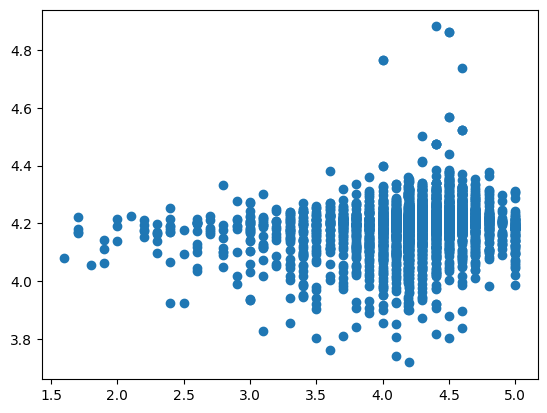

In [291]:
plt.scatter(y_test,y_pred_test)
plt.show()

Modelimizin yüksek başarı oranına sahip olduğu söylenemez gibi duruyor.

In [293]:
from sklearn.metrics import r2_score

In [295]:
r2score = r2_score(y_test,y_pred_test)

In [297]:
r2score

0.03186560696570695

Beklediğim üzere düşük bir oran çıktı. Outlier var mı kontrol ediyorum

## Araştırma Kısmı

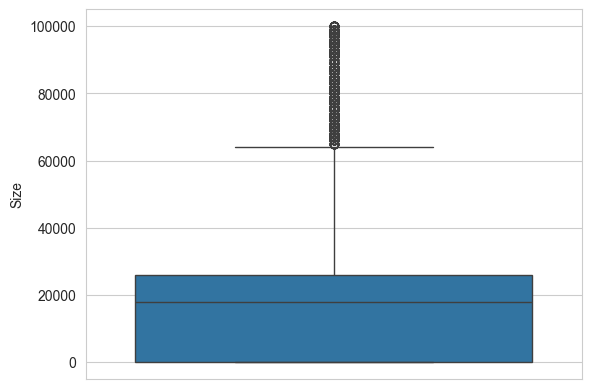

In [304]:
sns.set_style("whitegrid")
sns.boxplot(y="Size",data=data)
plt.ylabel("Size")
plt.show()

In [308]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver',
       'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Content Rating_Mature 17+', 'Content Rating_Teen',
       'Content Rating_Unrated', 'Day', 'Month', 'Year'],
      dtype='object')

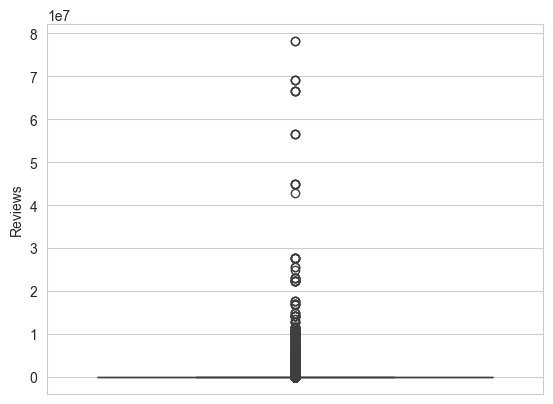

In [312]:
sns.set_style("whitegrid")
sns.boxplot(y="Reviews",data=data)
plt.ylabel("Reviews")
plt.show()

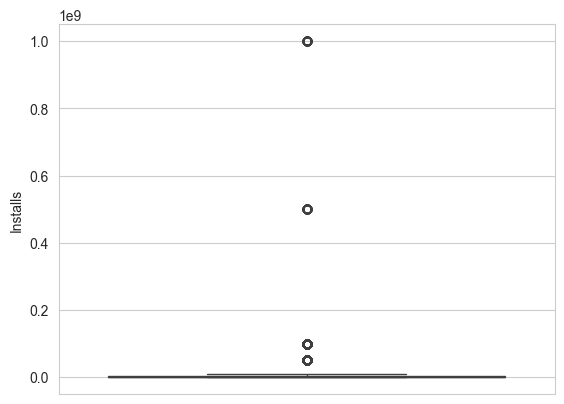

In [327]:
sns.set_style("whitegrid")
sns.boxplot(y="Installs",data=data)
plt.ylabel("Installs")
plt.show()

## Genel Çıkarım ve Özet

Google Play veri seti üzerinde çalıştığım bu proje çok fazla gürültülü veriye sahipti. Korelasyona uygun hale getirebildiğim tüm kolonları düzenledim. Kimisinde label encoder kimisinde one hot encoder uyguladım. Sonuçta hepsi bağımlı değişken olan "Rating" ile korelasyona uygun hale geldi. Uygula ismi gibi kategorik veriler üzerinde yapabileceğim bir şey yoktu. Onları es geçmek zorunda kaldım. Bu işlemleri uygularken önemli kavramlar öğrendim. "Coerce" kavramını daha önce duymamıştım. Pratik bir kullanımla sayıya çevrilemeyen verileri nan yapmamı sağladı.

Bu regresyon modelinde başarı oranı çok çok düşük. Bunun bir çok sebebi olabilir. Örneğin bir çok aşırı değer içeriyor veri setimiz. Dengeli bir dağılım yok. Android ve mevcut versiyon kolonlarında "split" fonksiyonu ile ilk kısmı ayırdım. Korelasyona sokamadığım kolonlar da başarı oranını elbette etkiler. Bu sebeplerden dolayı düşük olduğunu düşünüyorum. Belki modelim düşük bir orana sahip fakat proje üzerinde çalışırken feature engineering alanında bir çok pratik yaptım.